In [1]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# 遍历寻找距离最近的中心点
def closest_center(p, centers):
    minI, minDst = 0, float("inf")
    for cI, c in enumerate(centers):
        dist = np.linalg.norm(p - c)
        if dist < minDst:
            minI = cI
            minDst = dist
    return minI

In [3]:
centers = []  # 解析中心点文件
with open("centers.txt", "r") as f:
    for line in f:
        center = line.strip().split("\t")[1]
        centers.append(np.array([float(x) for x in center.split(",")]))

point_nums = 2048
data = np.load("data.npy")

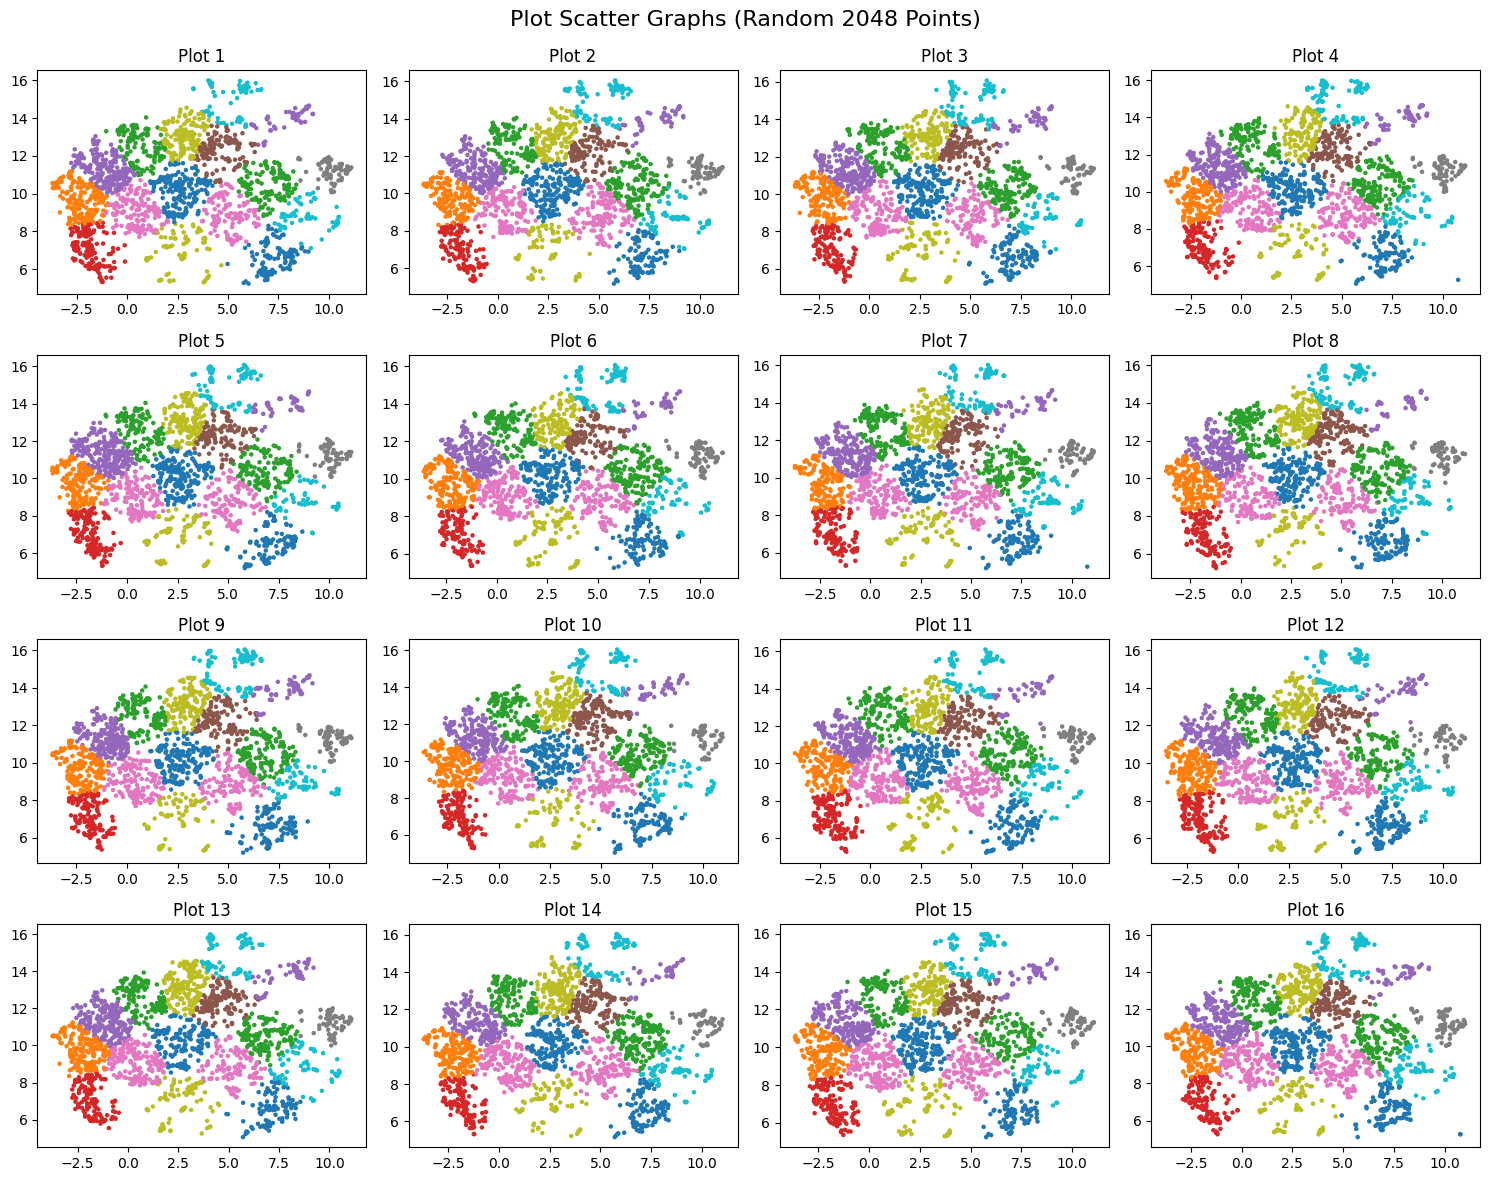

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
fig.suptitle(f"Plot Scatter Graphs (Random {point_nums} Points)", fontsize=16)

for i in range(4):
    for j in range(4):
        indices = np.random.choice(data.shape[0], point_nums, replace=False)
        cI = np.array([closest_center(p, centers) for p in data[indices]])
        axs[i, j].scatter(data[indices, 0], data[indices, 1], c=cI, s=5, cmap=plt.cm.tab10)
        axs[i, j].set_title(f"Plot {i * 4 + j + 1}")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [5]:
# 读取文本文件
input_name = "stackoverflow-mysql.jsonl"
input_df = pd.read_json(input_name, lines=True)

In [6]:
# 计算每个向量所属的簇类
n = len(centers)
cluster_idx = [[] for _ in range(n)]
for i, p in tqdm(enumerate(data), total=len(data)):
    cI = closest_center(p, centers)
    cluster_idx[cI].append(i)

100%|██████████| 187181/187181 [00:24<00:00, 7600.51it/s]


In [7]:
# 拼接每个簇类的标题
cluster_text = []
for i, idx in enumerate(cluster_idx):
    text = "".join(input_df["Title"][idx])
    cluster_text.append(text)

In [8]:
# 移除干扰词
rm_words = ["use", "data", "table", "database", "base", "SQL", "MySQL", "mysql", "MySql", "Mysql", "query", "using", "value", "row", "column", "s"]
rm_pattern = r"\b" + r"\b|\b".join(rm_words) + r"\b"
for i, text in enumerate(cluster_text):
    cluster_text[i] = re.sub(rm_pattern, "", text)

In [9]:
# 生成每个簇类的词云
wordclouds = []
for i in tqdm(range(n)):
    wordclouds.append(
        WordCloud(width=840, height=580, background_color="white").generate(
            cluster_text[i]
        )
    )

100%|██████████| 16/16 [00:28<00:00,  1.78s/it]


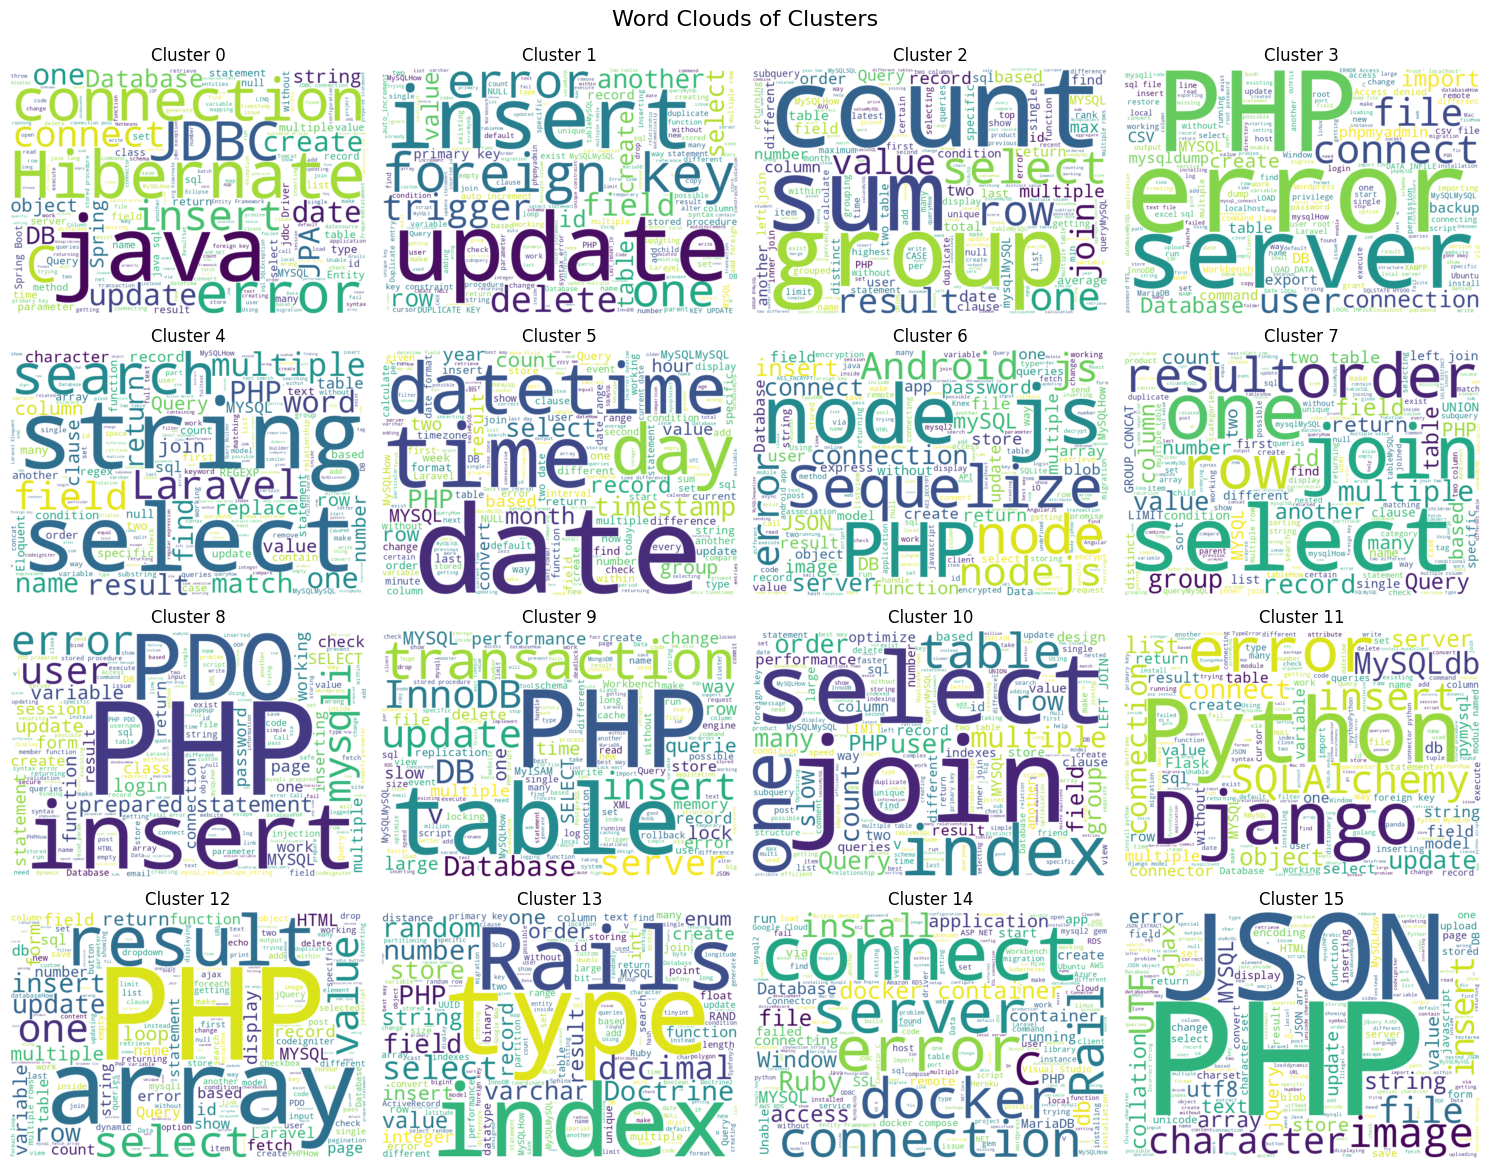

In [10]:
# 绘制每个簇类的词云图
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
fig.suptitle(f"Word Clouds of Clusters", fontsize=16)

for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ax.imshow(wordclouds[i * 4 + j], interpolation="bilinear")
        ax.axis("off")
        ax.set_title(f"Cluster {i * 4 + j}")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

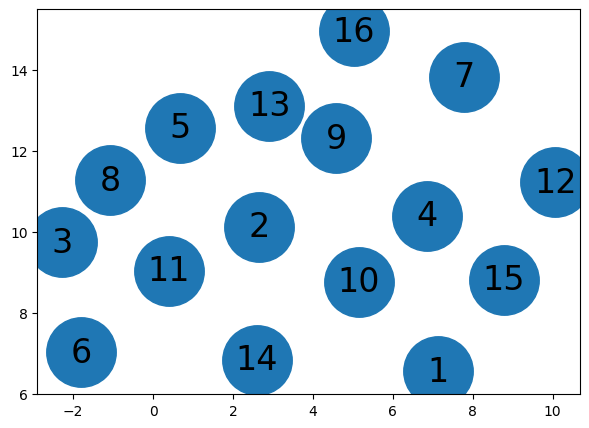

In [11]:
x, y = zip(*centers)
plt.figure(figsize=(7, 5))
plt.scatter(x, y, color="tab:blue", s=2500)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi, yi, str(i + 1), fontsize=24, ha="center", va="center")

plt.ylim(6, 15.5)
plt.show()